In [1]:
# v0.1.0

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.6)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def trainDataLoadKaggle():
    """
        This code works only on the Kaggle kernel!
    """
    from kaggle.competitions import twosigmanews

    env = twosigmanews.make_env()
    (market_df, news_df) = env.get_training_data()
    return (market_df, news_df)

#     (market_train_df.shape, news_train_df.shape)
        
def loadDataLocally(market=True, news=True):
    if market is True:
        market_df = pd.read_csv('./sampleData/marketdata_sample.csv')
    
    if news is True:
        news_df = pd.read_csv('./sampleData/news_sample.csv')
    
    return (market_df, news_df)

In [3]:
def timeCut(df,time, replace=True):
    '''
    df: dataFrame with attribute time in datatime64 format
    time: a time in string
    return df slice cutting off the time before the time provided
    '''
    df.time=pd.to_datetime(df.time)
    time=pd.Timestamp(time)
    df_slice = df[df.time>time]
    if replace:
        df=df_slice
    return df_slice

def formatCodeSet(df,field):
    '''
    df:dataframe
    field:field name of the code in the form string in set format
    return the field formatted into array
    '''
    return df[field].str.findall(f"'([\w\./]+)'")

In [4]:
# Load the data locally
(market_train_df, news_train_df) = loadDataLocally()

In [ ]:
# Load the data from the Kaggle kernel
(market_train_df, news_train_df) = trainDataLoadKaggle()

In [43]:
# Depends on the need, cut the data into smaller size for dev testing to save resources

time = '2012-12-31'
# its best to get the data with a time cut
if time:
    market_train_df = timeCut(market_train_df,time)
    news_train_df = timeCut(news_train_df,time)
    
news_train_df['subjects'] = formatCodeSet(news_train_df,'subjects')
news_train_df['audiences'] = formatCodeSet(news_train_df,'audiences')
news_train_df['assetCodes'] = formatCodeSet(news_train_df,'assetCodes')

# Market Data Features

## Stock prices
Stock prices can contain a lot of information. Being able to pick up signals from different stock prices could help boosting the performance. The stock price of different stocks may have very high correlation. If the model can learn the price relationship between the stock, it would help the model to pass on the information about one stock to another.

First we will neet to check the values. 

In [79]:
pivot=market_train_df.pivot(index='time',columns='assetCode',values='returnsClosePrevMktres10')
pivot.head()

assetCode,A.N,AA.N,AAL.O,AAMRQ.OB,AAN.N,AAON.O,AAP.N,AAPL.O,AAT.N,AAV.N,AAVL.O,AAWW.O,AB.N,ABAX.O,ABB.N,ABBV.N,ABC.N,ABCB.O,ABCO.O,ABEV.N,ABG.N,ABM.N,ABMD.O,ABT.N,ABV.N,ABX.N,ABY.O,ACAD.O,ACAS.O,ACAT.O,ACC.N,ACCL.O,ACCO.N,ACE.N,ACET.O,ACGL.O,ACH.N,ACHC.O,ACHN.O,ACIA.O,ACIW.O,ACM.N,ACN.N,ACO.N,ACOR.O,ACTG.O,ACTV.N,ACXM.O,ADBE.O,ADC.N,ADI.O,ADM.N,ADNT.N,ADP.O,ADPT.N,ADRO.O,ADS.N,ADSK.O,ADT.N,ADTN.O,ADVS.O,AEC.N,AEE.N,AEG.N,AEGN.O,AEGR.O,AEIS.O,AEL.N,AEM.N,AEO.N,AEP.N,AER.N,AERI.O,AES.N,AET.N,AF.N,AFFX.O,AFFY.O,AFG.N,AFL.N,AFSI.O,AG.N,AGCO.N,AGI.N,AGIO.O,AGN.N,AGNC.O,AGO.N,AGR.N,AGRO.N,AGU.N,AHL.N,AHS.N,AHT.N,AIBYY.O,AIBYY.OB,AIG.N,AIMT.O,AINV.O,AIR.N,AIRM.O,AIT.N,AIV.N,AIZ.N,AJG.N,AJRD.N,AKAM.O,AKG.A,AKR.N,AKRX.O,AKS.N,AL.N,ALB.N,ALDR.O,ALDW.N,ALE.N,ALEX.N,ALGN.O,ALGT.O,ALJ.N,ALK.N,ALKS.O,ALL.N,ALLE.N,ALLT.O,ALLY.N,ALNY.O,ALR.N,ALRM.O,ALSN.N,ALTE.O,ALTR.O,ALU.N,ALV.N,ALXN.O,AM.N,AMAG.O,AMAP.O,AMAT.O,AMBA.O,AMBC.O,AMC.N,AMCC.O,AMCX.O,AMD.N,AMD.O,AME.N,AMED.O,AMG.N,AMGN.O,AMH.N,AMKR.O,AMN.N,AMP.N,AMPH.O,AMRI.O,AMRN.O,AMSG.O,AMT.N,AMTD.N,AMTD.O,AMTG.N,AMX.N,AMZN.O,AN.N,ANAC.O,ANDE.O,ANET.N,ANF.N,ANGI.O,ANH.N,ANIP.O,ANN.N,ANR.N,ANSS.O,ANTM.N,ANV.A,AOL.N,AON.N,AOS.N,APA.N,APAM.N,APC.N,APD.N,APEI.O,APFH.N,APH.N,APKT.O,APL.N,APLE.N,APO.N,APOG.O,APOL.O,APU.N,AR.N,ARCB.O,ARCC.O,ARCO.N,ARCT.O,ARE.N,AREX.O,ARG.N,ARI.N,ARIA.O,ARII.O,ARLP.O,ARMH.O,ARMK.N,ARNC.N,AROC.N,ARPI.N,ARR.N,ARRS.O,ARRY.O,ARTC.O,ARUN.O,ARW.N,ASB.N,ASBC.O,ASCA.O,ASH.N,ASIA.O,ASML.O,ASNA.O,ASPS.O,ASPX.O,ASX.N,AT.N,ATHL.N,ATHM.N,ATHN.O,ATI.N,ATMI.O,ATML.O,ATO.N,ATR.N,ATRA.O,ATSG.O,ATU.N,ATVI.O,ATW.N,AU.N,AUO.N,AUQ.N,AUXL.O,AUY.N,AVA.N,AVAL.N,AVAV.O,AVB.N,...,TYPE.O,UA.N,UAL.N,UAM.N,UAN.N,UAc.N,UBNT.O,UBS.N,UBSI.O,UCBI.O,UDR.N,UE.N,UEPS.O,UFS.N,UGI.N,UGP.N,UHS.N,UIL.N,UIS.N,UL.N,ULTA.O,ULTI.O,UMBF.O,UMC.N,UMPQ.O,UN.N,UNFI.O,UNH.N,UNM.N,UNP.N,UNS.N,UNT.N,UNVR.N,UPL.N,UPS.N,URBN.O,URI.N,URS.N,USB.N,USCR.O,USFD.N,USG.N,USNA.N,USTR.O,UTEK.O,UTHR.O,UTIW.O,UTX.N,UVE.N,UVV.N,V.N,VA.O,VAC.N,VAL.N,VALE.N,VALEp.N,VAR.N,VC.N,VCI.N,VECO.O,VEDL.N,VEEV.N,VER.N,VFC.N,VG.N,VGR.N,VHC.A,VHS.N,VIAB.O,VIAV.O,VIPS.N,VIRT.O,VIV.N,VIVO.O,VLO.N,VLRS.N,VLY.N,VMC.N,VMED.O,VMI.N,VMW.N,VNDA.O,VNET.O,VNO.N,VNR.N,VNR.O,VNTV.N,VOD.O,VOLC.O,VOYA.N,VPHM.O,VPRT.O,VR.N,VRA.O,VRNT.O,VRSK.O,VRSN.O,VRTU.O,VRTX.O,VSAT.O,VSH.N,VSI.N,VSLR.N,VSM.N,VSTO.N,VTR.N,VVC.N,VVI.N,VVUS.O,VVV.N,VWR.O,VZ.N,W.N,WAB.N,WABC.O,WAC.N,WAFD.O,WAG.N,WAGE.N,WAIR.N,WAL.N,WAT.N,WB.O,WBA.O,WBAI.N,WBC.N,WBMD.O,WBS.N,WBSN.O,WCC.N,WCG.N,WCN.N,WCRX.O,WD.N,WDAY.N,WDC.O,WDR.N,WEB.O,WEC.N,WEN.O,WERN.O,WES.N,WETF.O,WEX.N,WFC.N,WFM.O,WFT.N,WGL.N,WGO.N,WHR.N,WIBC.O,WING.O,WIT.N,WIX.O,WLK.N,WLTW.O,WM.N,WMB.N,WMC.N,WMGI.O,WMS.N,WMT.N,WNC.N,WNR.N,WOOF.O,WOR.N,WPC.N,WPG.N,WPP.N,WPRT.O,WPX.N,WPZ.N,WR.N,WRB.N,WRC.N,WRE.N,WRI.N,WRK.N,WSM.N,WSO.N,WST.N,WSTC.O,WTFC.O,WTI.N,WTR.N,WTS.N,WTW.N,WU.N,WUBA.N,WWAV.N,WWD.O,WWE.N,WWW.N,WX.N,WXS.N,WY.N,WYN.N,WYNN.O,X.N,XEC.N,XEL.N,XENT.O,XHR.N,XL.N,XLNX.O,XLRN.O,XLS.N,XNCR.O,XNET.O,XOG.O,XOM.N,XON.N,XONE.O,XOOM.O,XPO.N,XRAY.O,XRS.N,XTXI.O,XXIA.O,XYL.N,YDKN.N,YELP.N,YHOO.O,YNDX.O,YOKU.N,YPF.N,YRCW.O,YRD.N,YUM.N,YUMC.N,YY.O,Z.O,ZAYO.N,ZBH.N,ZBRA.O,ZEN.N,ZG.O,ZINC.O,ZION.O,ZIOP.O,ZLTQ.O,ZMH.N,ZNGA.O,ZOES.N,ZQK.N,ZSPH.O,ZTO.N,ZTS.N,ZU.O,ZUMZ.O
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-31 22:00:00,0.019309,NaN,NaN,NaN,0.024555,NaN,0.000777,0.020997,NaN,NaN,NaN,0.057732,0.024058,NaN,0.009995,NaN,-0.011799,NaN,-0.045364,NaN,0.089082,-0.016996,0.051557,-0.005014,0.000627,0.016373,NaN,NaN,-0.024375,NaN,0.026506,NaN,0.072173,-0.000442,NaN,-0.008468,NaN,0.032576,

There are a number of NaNs which we would need to consider later.
Now we should also check if there are outliners which we may need to remove.

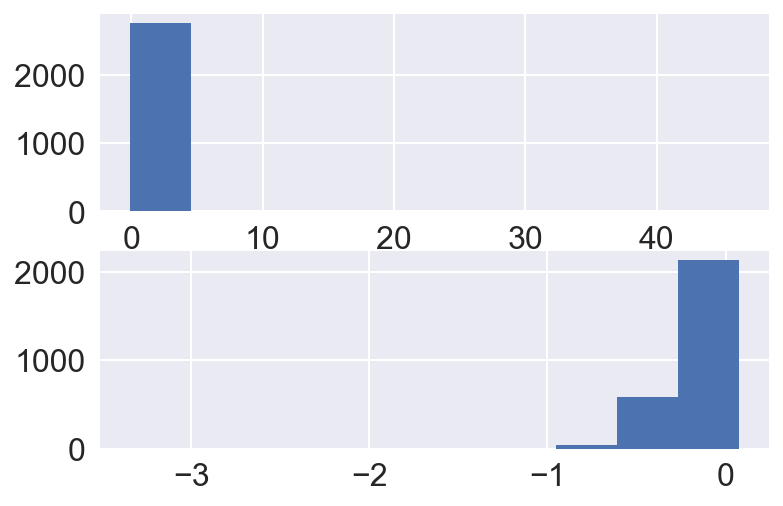

In [83]:
#Check if there is extreme values
plt.subplot(2, 1, 1)
pivot.max().hist()
plt.subplot(2, 1, 2)
pivot.min().hist()

Anything outside the range [1,-1] is abnormal as 99.9% of the values sit between 1 and -1. Of course there could be other reasons which we should investigate, for now, replace them and all the other nans with zeros.

The correlation plot below shows that stocks are highly correlated which means that when we know that a new affect one stock, it could well affect other stocks even if they are not listed in the dataset.

In [103]:
pivot.head()

assetCode,A.N,AA.N,AAL.O,AAMRQ.OB,AAN.N,AAON.O,AAP.N,AAPL.O,AAT.N,AAV.N,AAVL.O,AAWW.O,AB.N,ABAX.O,ABB.N,ABBV.N,ABC.N,ABCB.O,ABCO.O,ABEV.N,ABG.N,ABM.N,ABMD.O,ABT.N,ABV.N,ABX.N,ABY.O,ACAD.O,ACAS.O,ACAT.O,ACC.N,ACCL.O,ACCO.N,ACE.N,ACET.O,ACGL.O,ACH.N,ACHC.O,ACHN.O,ACIA.O,ACIW.O,ACM.N,ACN.N,ACO.N,ACOR.O,ACTG.O,ACTV.N,ACXM.O,ADBE.O,ADC.N,ADI.O,ADM.N,ADNT.N,ADP.O,ADPT.N,ADRO.O,ADS.N,ADSK.O,ADT.N,ADTN.O,ADVS.O,AEC.N,AEE.N,AEG.N,AEGN.O,AEGR.O,AEIS.O,AEL.N,AEM.N,AEO.N,AEP.N,AER.N,AERI.O,AES.N,AET.N,AF.N,AFFX.O,AFFY.O,AFG.N,AFL.N,AFSI.O,AG.N,AGCO.N,AGI.N,AGIO.O,AGN.N,AGNC.O,AGO.N,AGR.N,AGRO.N,AGU.N,AHL.N,AHS.N,AHT.N,AIBYY.O,AIBYY.OB,AIG.N,AIMT.O,AINV.O,AIR.N,AIRM.O,AIT.N,AIV.N,AIZ.N,AJG.N,AJRD.N,AKAM.O,AKG.A,AKR.N,AKRX.O,AKS.N,AL.N,ALB.N,ALDR.O,ALDW.N,ALE.N,ALEX.N,ALGN.O,ALGT.O,ALJ.N,ALK.N,ALKS.O,ALL.N,ALLE.N,ALLT.O,ALLY.N,ALNY.O,ALR.N,ALRM.O,ALSN.N,ALTE.O,ALTR.O,ALU.N,ALV.N,ALXN.O,AM.N,AMAG.O,AMAP.O,AMAT.O,AMBA.O,AMBC.O,AMC.N,AMCC.O,AMCX.O,AMD.N,AMD.O,AME.N,AMED.O,AMG.N,AMGN.O,AMH.N,AMKR.O,AMN.N,AMP.N,AMPH.O,AMRI.O,AMRN.O,AMSG.O,AMT.N,AMTD.N,AMTD.O,AMTG.N,AMX.N,AMZN.O,AN.N,ANAC.O,ANDE.O,ANET.N,ANF.N,ANGI.O,ANH.N,ANIP.O,ANN.N,ANR.N,ANSS.O,ANTM.N,ANV.A,AOL.N,AON.N,AOS.N,APA.N,APAM.N,APC.N,APD.N,APEI.O,APFH.N,APH.N,APKT.O,APL.N,APLE.N,APO.N,APOG.O,APOL.O,APU.N,AR.N,ARCB.O,ARCC.O,ARCO.N,ARCT.O,ARE.N,AREX.O,ARG.N,ARI.N,ARIA.O,ARII.O,ARLP.O,ARMH.O,ARMK.N,ARNC.N,AROC.N,ARPI.N,ARR.N,ARRS.O,ARRY.O,ARTC.O,ARUN.O,ARW.N,ASB.N,ASBC.O,ASCA.O,ASH.N,ASIA.O,ASML.O,ASNA.O,ASPS.O,ASPX.O,ASX.N,AT.N,ATHL.N,ATHM.N,ATHN.O,ATI.N,ATMI.O,ATML.O,ATO.N,ATR.N,ATRA.O,ATSG.O,ATU.N,ATVI.O,ATW.N,AU.N,AUO.N,AUQ.N,AUXL.O,AUY.N,AVA.N,AVAL.N,AVAV.O,AVB.N,...,TYPE.O,UA.N,UAL.N,UAM.N,UAN.N,UAc.N,UBNT.O,UBS.N,UBSI.O,UCBI.O,UDR.N,UE.N,UEPS.O,UFS.N,UGI.N,UGP.N,UHS.N,UIL.N,UIS.N,UL.N,ULTA.O,ULTI.O,UMBF.O,UMC.N,UMPQ.O,UN.N,UNFI.O,UNH.N,UNM.N,UNP.N,UNS.N,UNT.N,UNVR.N,UPL.N,UPS.N,URBN.O,URI.N,URS.N,USB.N,USCR.O,USFD.N,USG.N,USNA.N,USTR.O,UTEK.O,UTHR.O,UTIW.O,UTX.N,UVE.N,UVV.N,V.N,VA.O,VAC.N,VAL.N,VALE.N,VALEp.N,VAR.N,VC.N,VCI.N,VECO.O,VEDL.N,VEEV.N,VER.N,VFC.N,VG.N,VGR.N,VHC.A,VHS.N,VIAB.O,VIAV.O,VIPS.N,VIRT.O,VIV.N,VIVO.O,VLO.N,VLRS.N,VLY.N,VMC.N,VMED.O,VMI.N,VMW.N,VNDA.O,VNET.O,VNO.N,VNR.N,VNR.O,VNTV.N,VOD.O,VOLC.O,VOYA.N,VPHM.O,VPRT.O,VR.N,VRA.O,VRNT.O,VRSK.O,VRSN.O,VRTU.O,VRTX.O,VSAT.O,VSH.N,VSI.N,VSLR.N,VSM.N,VSTO.N,VTR.N,VVC.N,VVI.N,VVUS.O,VVV.N,VWR.O,VZ.N,W.N,WAB.N,WABC.O,WAC.N,WAFD.O,WAG.N,WAGE.N,WAIR.N,WAL.N,WAT.N,WB.O,WBA.O,WBAI.N,WBC.N,WBMD.O,WBS.N,WBSN.O,WCC.N,WCG.N,WCN.N,WCRX.O,WD.N,WDAY.N,WDC.O,WDR.N,WEB.O,WEC.N,WEN.O,WERN.O,WES.N,WETF.O,WEX.N,WFC.N,WFM.O,WFT.N,WGL.N,WGO.N,WHR.N,WIBC.O,WING.O,WIT.N,WIX.O,WLK.N,WLTW.O,WM.N,WMB.N,WMC.N,WMGI.O,WMS.N,WMT.N,WNC.N,WNR.N,WOOF.O,WOR.N,WPC.N,WPG.N,WPP.N,WPRT.O,WPX.N,WPZ.N,WR.N,WRB.N,WRC.N,WRE.N,WRI.N,WRK.N,WSM.N,WSO.N,WST.N,WSTC.O,WTFC.O,WTI.N,WTR.N,WTS.N,WTW.N,WU.N,WUBA.N,WWAV.N,WWD.O,WWE.N,WWW.N,WX.N,WXS.N,WY.N,WYN.N,WYNN.O,X.N,XEC.N,XEL.N,XENT.O,XHR.N,XL.N,XLNX.O,XLRN.O,XLS.N,XNCR.O,XNET.O,XOG.O,XOM.N,XON.N,XONE.O,XOOM.O,XPO.N,XRAY.O,XRS.N,XTXI.O,XXIA.O,XYL.N,YDKN.N,YELP.N,YHOO.O,YNDX.O,YOKU.N,YPF.N,YRCW.O,YRD.N,YUM.N,YUMC.N,YY.O,Z.O,ZAYO.N,ZBH.N,ZBRA.O,ZEN.N,ZG.O,ZINC.O,ZION.O,ZIOP.O,ZLTQ.O,ZMH.N,ZNGA.O,ZOES.N,ZQK.N,ZSPH.O,ZTO.N,ZTS.N,ZU.O,ZUMZ.O
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-31 22:00:00,0.019309,NaN,NaN,NaN,0.024555,NaN,0.000777,0.020997,NaN,NaN,NaN,0.057732,0.024058,NaN,0.009995,NaN,-0.011799,NaN,-0.045364,NaN,0.089082,-0.016996,0.051557,-0.005014,0.000627,0.016373,NaN,NaN,-0.024375,NaN,0.026506,NaN,0.072173,-0.000442,NaN,-0.008468,NaN,0.032576,

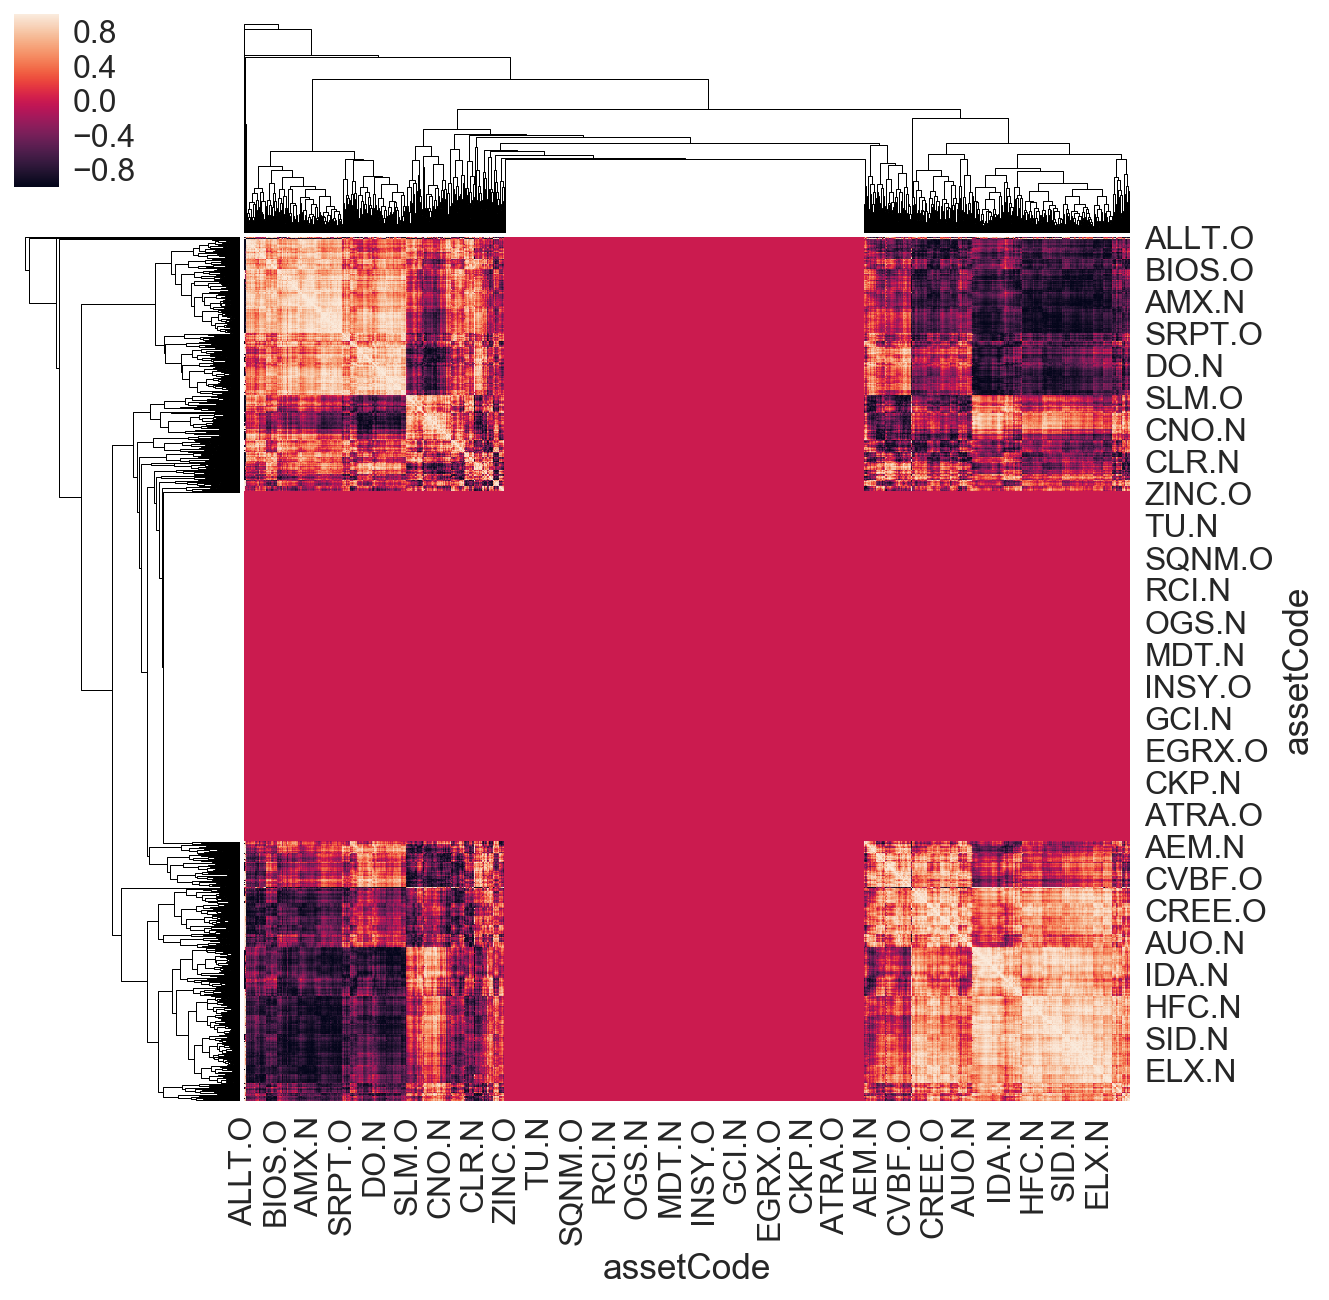

In [87]:
pivot[np.abs(pivot)>1]=np.nan
sns.clustermap(pivot.head().corr().fillna(0))

Instead of look at one stocks, we can use dimension reduction methods to embed the price of the stocks on the market using PCA or VAE. Before doing so, we will need to fill in the NAs.

There are two cases that there will be NAs. First, it could be the case that the stock did not exist, the other case is that the stock was not monitored.

To handle that, we use zeroes to replace the NANs in the first row and then replace the nans with the last value seen.

In [137]:
def fillMissing(df,columns,value):
    '''
    It fills the NAs of the df directly(not pure function)
    df: dataframe
    columns: features to be filled
    return a dataframe with the missing data being replaced by last entry
    '''
    valueLkUp={feat:value for feat in columns}
    for index, row in df.iterrows():
        for feat in columns:
            if(not np.isnan(row[feat])):
                valueLkUp[feat]=row[feat]
            else:
                df.at[index,feat]=valueLkUp[feat]
    return df

In [141]:
pivot=fillMissing(pivot,pivot.columns,0)

## PCA
Consider the prices on the stock market as a vector, applying PCA can factorise the stock prices into a smaller vector. 
To do this, we can set a time period back in the past and calculate the components for the PCA in this time period. Notice that it may not be a good idea to include the whole timeline. One reason is because the computation is heavy. The other reason is we only want to include updated data.

To create such vector, we define a lookback period and get the pca. Then base on the stock price combination, we can calculate the PCA component factors.

In [237]:
def PCA_embedding(df,timeStart,timeEnd,components):
    import numpy as np
    from sklearn.decomposition import PCA
    T_s=pd.Timestamp(timeStart)
    T_e=pd.Timestamp(timeEnd)
    df_T=df[T_s:T_e]
    pca = PCA(n_components=components)
    pca.fit(pivot[T_s:T_e])
    return pca

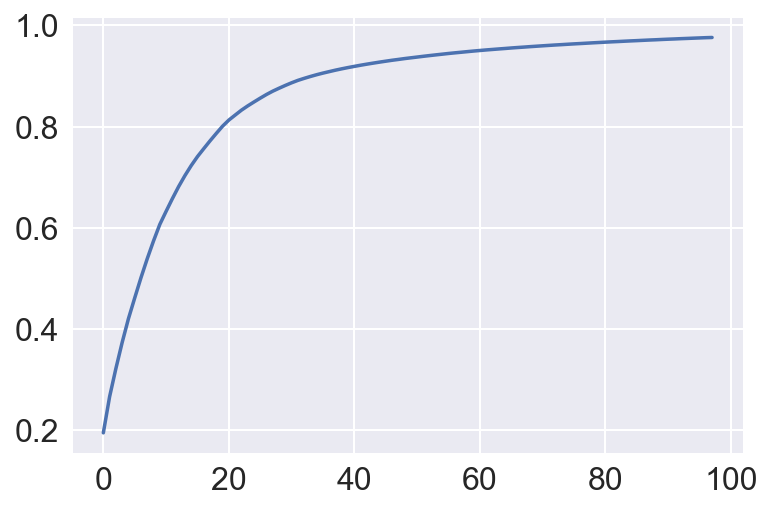

In [225]:
'''
elbow_curve=[]
for c in range(2,100):
    pca=PCA_embedding(pivot,'2013-1-1','2013-12-30',c)
    elbow_curve.append((pca.explained_variance_ratio_.sum()))
plt.plot([i for i in elbow_curve])
'''

There is a constant trade off between the number of components to use and the information we keep. To search for the right number of components, we search for the elbow point of the explained variance ratio.

The more information contained in the data(the more data points), more components would be needed to explain the same ratio of variance. For 1 year data, the elbow point is 15 which seems to be a good cut. 

In [261]:
pca=PCA_embedding(pivot,'2013-1-1','2013-12-30',10)

To retrieve the embedding for a unit vector of a stock(e.g. A.N):

In [257]:
def getColVec(columns,col):
    '''
    columns: columns object of a dataframe
    col: the column to be created
    return a zero vector with a 1 entry at the corresponding index of col.
    '''
    vec=np.zeros(len(columns))
    vec[columns.get_loc(col)]=1
    return vec

In [262]:
pca.transform([getColVec(pivot.columns,'A.N')])

array([[-0.24192748, -0.13518575,  0.2712236 , -0.23309408,  0.08154021,
        -0.09434818, -0.00950983,  0.11830374,  0.04852163, -0.32585366]])

Note: To avoid information leak, we will need to decide where to period used to train the pca embedding and make sure the embedding period is strictly before the observation. To do time calculation:

In [230]:
pd.Timestamp('2012-1-1')- pd.Timedelta(days=1)

Timestamp('2011-12-31 00:00:00')